In [1]:
from src.manipulator import REPAEManipulator, DiffusionCandidateList
import torch
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

/home/weissl/miniconda3/envs/repa-e/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Diffusion Example
This notebooks shows how to manipulate the diffusion process in Latent Diffusion Models.

In [2]:
manipulator = REPAEManipulator(
    image_resolution=256,
    model_file="../models/generators/ldm_im.pt"
)
device = manipulator._device  # Select device used in manipulation

Using cache found in /home/weissl/.cache/torch/hub/facebookresearch_dinov2_main
/home/weissl/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/weissl/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/weissl/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


In [6]:
candidates = DiffusionCandidateList.from_diffusion_output(*manipulator.get_diff_steps([1,2])) # Get diffusion history and class embedding for two different classes.

In [7]:
n_steps = candidates.xts.shape[1] # Get number of steps in diffusion

In [9]:
"""Here we make the manipulation strategy which takes 1 of the original in all steps except the ones defined below."""
weights_x = torch.ones(n_steps, device=device)
weights_y = torch.ones(n_steps, device=device)

for e in [0,1,2,3,4]:  # This steps we do some actual manipulation.
    weights_x[e] = 0.2
    weights_y[e] = 0.2

x_weights = torch.stack([weights_x, 1-weights_x], dim=0)
y_weights = torch.stack([weights_y, 1-weights_y], dim=0)

# Now we manipulate the diffusion process
x_cur = manipulator.manipulate(candidates, x_weights, y_weights)

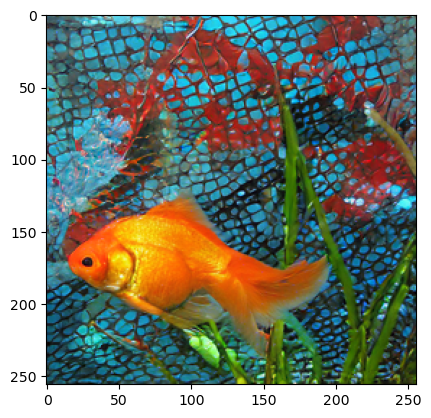

In [10]:
im = manipulator.get_image(x_cur)
plt.imshow(im.squeeze().cpu().numpy().transpose(1,2,0))  # Show generated image